# Get Data

In [1]:
import os
import pandas as pd 
import pickle

# "magic commands" to enable autoreload of your imported packages
%load_ext autoreload
%autoreload 2

Firsly, let's explore the data folder:
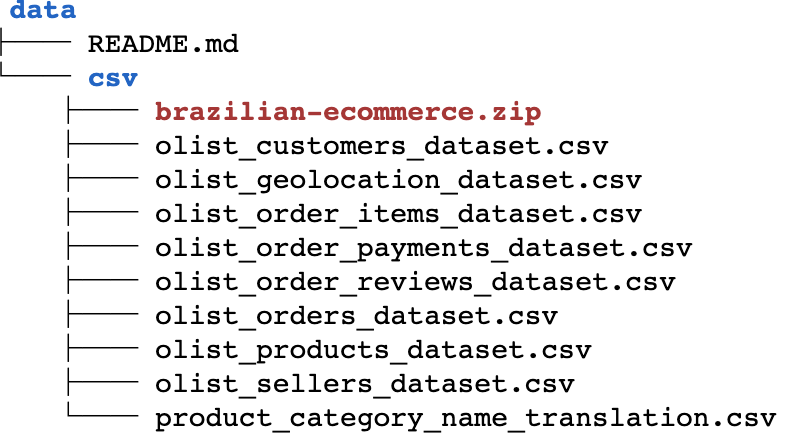

## put all data into one dictionary `data`

In [2]:
csv_path = os.path.join(os.getcwd(), 'data', 'csv')

file_names = [f for f in os.listdir(csv_path) if f.endswith(".csv")]

key_names = [
    name.replace("olist_", "")
    .replace(".csv", "")
    .replace("_dataset", "")
    for name in file_names
]

values = [pd.read_csv(path) for path in [os.path.join(csv_path,file_name) for file_name in file_names]]

data = {key:value for (key, value) in zip(key_names, values)}

**Pickle it:**

In [7]:
with open('data_dict', 'wb') as file:
    pickle.dump(data, file)

In [10]:
# with open('data_dict', 'rb') as file:
#     data_ = pickle.load(file)

# EDA-Orders(delivered)

**Problem Statement**:
> What result in bad rating?

**Check properties**:
* id
* wait_time
* price
* freight_value
* num_of_products
* num_of_sellers
* is_delay
* distance
* review_score

In [20]:
### Select useful features
for key in data:
    print(f"{key}:")
    print(data[key].columns)
    print("==" * 10)

sellers:
Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')
product_category_name_translation:
Index(['product_category_name', 'product_category_name_english'], dtype='object')
orders:
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
order_items:
Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')
customers:
Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')
geolocation:
Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')
order_payments:
Index(['order_id', 'payment_sequential', 'payment_type',
  

In [22]:
## Create a new df of orders for analysis
orders = pd.DataFrame()

## Only evaluate delivered orders
order_tmp = data['orders'].copy()
order_tmp = order_tmp[order_tmp['order_status'] == 'delivered']

## Add id to orders df
orders.loc[:, 'id'] = order_tmp.order_id

## add review_score & score to df
reviews_tmp = data['order_reviews'].copy()
orders = \
orders.merge(
reviews_tmp.groupby('order_id').agg({'review_score': 'mean', 'review_comment_message': list}),
how = "left",
left_on = "id",
right_index = True
)

In [75]:
## add price and freight value to orders df
items = data['order_items'].copy()
items.groupby("order_id").agg({'product_id': "nunique", "order_item_id": "count"}).sort_values(by = "product_id")

,product_id,order_item_id
order_id,,
00010242fe8c5a6d1ba2dd792cb16214,1,1
a9da66f1dfe4cca8956f5e74619c2cb9,1,1
a9da0d64f6c4dff3f3f383f6b076b24a,1,2
a9d9e48bc0905664f33c53779b5edfb6,1,1
a9d9773efe0a981195d2861250cff4d9,1,1
...,...,...
3990f96693d321ac142fff312bf3706a,6,6
ad850e69fce9a512ada84086651a2e7d,7,7
77df84f9195be22a4e9cb72ca9e8b4c2,7,7


In [76]:
items[items.order_id == "ca3625898fbd48669d50701aba51cd5f"]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
89007,ca3625898fbd48669d50701aba51cd5f,1,1065e0ebef073787a7bf691924c60eeb,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,309.0,1.84
89008,ca3625898fbd48669d50701aba51cd5f,2,0cf2faf9749f53924cea652a09d8e327,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,33.9,1.84
89009,ca3625898fbd48669d50701aba51cd5f,3,0de59eddc63167215c972b0d785ffa7b,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,159.0,3.67
89010,ca3625898fbd48669d50701aba51cd5f,4,0de59eddc63167215c972b0d785ffa7b,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,159.0,3.67
89011,ca3625898fbd48669d50701aba51cd5f,5,5dae498eff2d80057f56122235a36aff,888faa8bfb0b159c37de6d898b961c31,2018-08-17 02:25:07,95.9,0.15
89012,ca3625898fbd48669d50701aba51cd5f,6,4a5c3967bfd3629fe07ef4d0cc8c3818,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,109.9,0.15
89013,ca3625898fbd48669d50701aba51cd5f,7,678c229b41c0e497d35a25a8be1cc631,888faa8bfb0b159c37de6d898b961c31,2018-08-17 02:25:07,95.9,0.15
89014,ca3625898fbd48669d50701aba51cd5f,8,21b524c4c060169fa75ccf08c7da4627,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,63.7,0.15
89015,ca3625898fbd48669d50701aba51cd5f,9,309dd69eb83cea38c51709d62befe1a4,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,56.0,3.68
89016,ca3625898fbd48669d50701aba51cd5f,10,309dd69eb83cea38c51709d62befe1a4,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,56.0,3.68


In [82]:
order_tmp[order_tmp.order_id == "ca3625898fbd48669d50701aba51cd5f"]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
59842,ca3625898fbd48669d50701aba51cd5f,0d861a5e4dd6a9079d89e1330848f0ab,delivered,2018-08-12 02:11:20,2018-08-12 02:25:07,2018-08-13 11:15:00,2018-08-21 12:18:48,2018-09-13 00:00:00


# Analysis on Seller

# Analysis on Product Category

# Analysis on Customer